In [1]:
import pandas as pd
df = pd.read_csv("Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


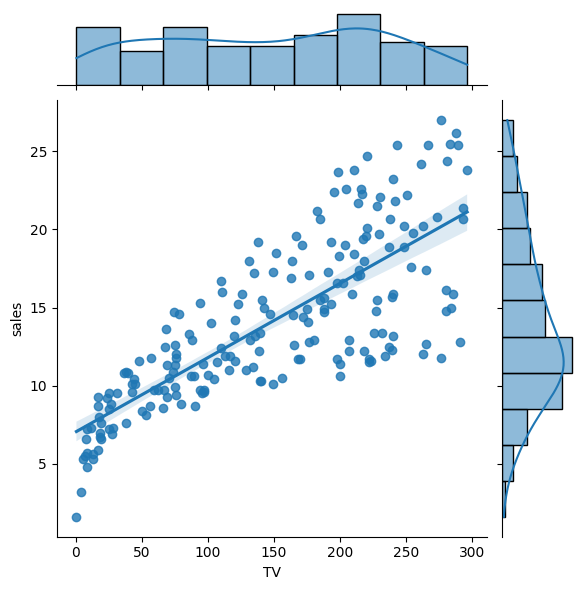

In [3]:
import seaborn as sns
sns.jointplot(x="TV",y="sales",data=df,kind="reg")
# sns.heatmap(df.corr(),annot=True)

In [4]:
from sklearn.linear_model import LinearRegression
x = df[["TV"]]
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [5]:
y = df[["sales"]]
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [6]:
regresyon = LinearRegression()

In [7]:
model = regresyon.fit(x,y)

In [8]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [9]:
model.intercept_

array([7.03259355])

In [10]:
model.coef_

array([[0.04753664]])

In [11]:
#rkare
model.score(x,y)

0.611875050850071

# Tahmin

(0.0, 28.27)

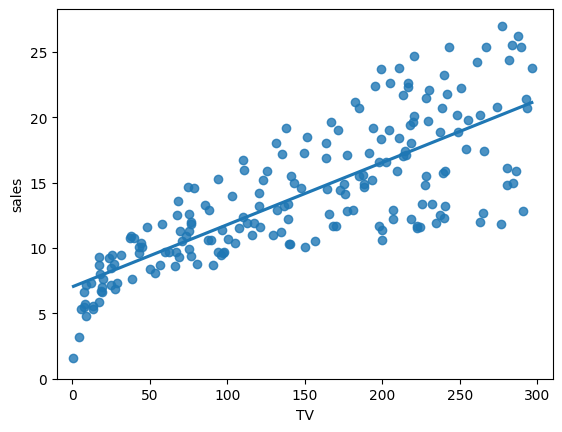

In [12]:
import matplotlib.pyplot as plt
g = sns.regplot(data=df,x=df["TV"],y=df["sales"],ci=None,scatter={'color':'red','s':9})
plt.xlim(-10,310)
plt.ylim(bottom=0)

Sales = 7.03*0.05*TV

In [13]:
model.predict([[165]])

c:\Users\S_05_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[14.87613922]])

In [14]:
yeni_veri = [[5],[15],[30]]

In [15]:
model.predict(yeni_veri)

c:\Users\S_05_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[7.27027675],
       [7.74564316],
       [8.45869276]])

MSE : Hata kareler ortalaması
RMSE : Hata Kareler Ortalamasının Karekökü

In [16]:
gercek_y = y[0:10]

In [17]:
tahmin_edilen_y  =pd.DataFrame(model.predict(x)[:10])

In [18]:
hatalar = pd.concat([gercek_y,tahmin_edilen_y],axis=1)

In [19]:
hatalar.columns = ["gercek y", "tahmin edilen y"]

In [20]:
hatalar

,gercek y,tahmin edilen y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [21]:
hatalar["hata"] = hatalar["gercek y"]- hatalar["tahmin edilen y"]

In [22]:
hatalar

,gercek y,tahmin edilen y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [23]:
hatalar["hata_kareler"] = hatalar["hata"]**2

In [24]:
hatalar

,gercek y,tahmin edilen y,hata,hata_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [25]:
import numpy as np
np.mean(hatalar["hata_kareler"])

9.290350329638102

# Çoklu Regresyon

In [26]:
x = df.drop(["sales"],axis=1)
y = df[["sales"]]
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [27]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


### Stats-model ile model

In [28]:
import statsmodels.api as sm

In [29]:
lm = sm.OLS(y,x)
model = lm.fit()

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Thu, 15 Dec 2022   Prob (F-statistic):                   2.43e-171
Time:                        17:00:33   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### scikit learn ile kur

In [31]:
model = lm = LinearRegression().fit(x,y)

In [32]:
model.intercept_

array([2.93888937])

In [33]:
model.coef_

array([[ 0.04576465,  0.18853002, -0.00103749]])

* sales = 2.94*0.04*Tv+0.118*radio-newspaper*0.001

In [34]:
yeni_veri = [[30],[10],[40]]
yeni_veri = pd.DataFrame(yeni_veri).T


In [35]:
model.predict(yeni_veri)

c:\Users\S_05_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[6.15562918]])

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [38]:
MSE = mean_squared_error(y,model.predict(x))

In [39]:
RMSE = np.sqrt(MSE)
RMSE

1.6685701407225697

# Model Tuning - Model Doğrulama

In [40]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [41]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [42]:
# Sınama seti 
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.20,random_state=4)

In [44]:
X_train.head()

,TV,radio,newspaper
26,142.9,29.3,12.6
134,36.9,38.6,65.6
180,156.6,2.6,8.3
158,11.7,36.9,45.2
189,18.7,12.1,23.4


In [45]:
Y_train.head()

,sales
26,15.0
134,10.8
180,10.5
158,7.3
189,6.7


In [46]:
model = lm = LinearRegression().fit(X_train,Y_train)

In [47]:
# eğitim hatası
np.sqrt(mean_squared_error(Y_train,model.predict(X_train)))

1.7196826677158092

In [48]:
#test hatası
np.sqrt(mean_squared_error(Y_test,model.predict(X_test)))

1.4890100982001084

In [49]:
# k-katlı cv
from sklearn.model_selection import cross_val_score

In [50]:
np.mean(-cross_val_score(model,X_train,Y_train,cv=10,scoring="neg_mean_squared_error"))

3.1900093299598473

In [51]:
np.mean(-cross_val_score(model,x,y,cv=10,scoring="neg_mean_squared_error"))

3.0599676181185145

# RIDGE REGRESYONU

In [52]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV


In [53]:
df = pd.read_csv("Hitters.csv")

In [54]:
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [55]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [56]:
df.shape

(263, 20)

In [57]:
ridge_model = Ridge(alpha=5).fit(X_train,y_train)

In [58]:
ridge_model

Ridge(alpha=5)

In [59]:
ridge_model.coef_

array([ -1.81040449,   8.87872786,   7.12487047,  -3.31713488,
        -2.01162162,   5.40691525,   7.25828404,  -0.13033385,
        -0.25425913,  -0.71109275,   1.81452   ,   0.77083457,
        -0.6768975 ,   0.26211894,   0.2646614 ,  -0.36947934,
        76.19519054, -90.15523668, -16.00453535])

In [60]:
ridge_model.intercept_

-3.425196868716739

In [61]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

In [62]:
ridge_model = Ridge()
katsayılar = []
for i in lambdalar:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train,y_train)
    katsayılar.append(ridge_model.coef_)
    

In [63]:
katsayılar

[array([ 1.08705828e-03,  3.59972026e-04,  5.52181027e-05,  1.92813177e-04,
         1.96696069e-04,  1.59478501e-04,  2.78199599e-05,  1.78978518e-02,
         5.28448603e-03,  6.33684784e-04,  2.78574434e-03,  2.70578331e-03,
         1.95710128e-03,  1.87423190e-03,  1.54040667e-04,  2.97933111e-06,
         2.39984989e-07, -1.51804510e-06,  3.31089982e-07]),
 array([ 1.41677983e-03,  4.69820454e-04,  7.18242293e-05,  2.52218183e-04,
         2.55763476e-04,  2.07728851e-04,  3.41731833e-05,  2.22675231e-02,
         6.58971645e-03,  7.96723486e-04,  3.48283639e-03,  3.38849662e-03,
         2.44474193e-03,  2.46055074e-03,  2.00411447e-04,  4.05879985e-06,
         3.06791363e-07, -2.00697735e-06,  4.22750663e-07]),
 array([ 1.84180994e-03,  6.11797854e-04,  9.31516430e-05,  3.29313865e-04,
         3.31574150e-04,  2.69862282e-04,  4.11993224e-05,  2.73092348e-02,
         8.10613246e-03,  9.90615632e-04,  4.29892819e-03,  4.19154557e-03,
         3.01420413e-03,  3.22598807e-03, 

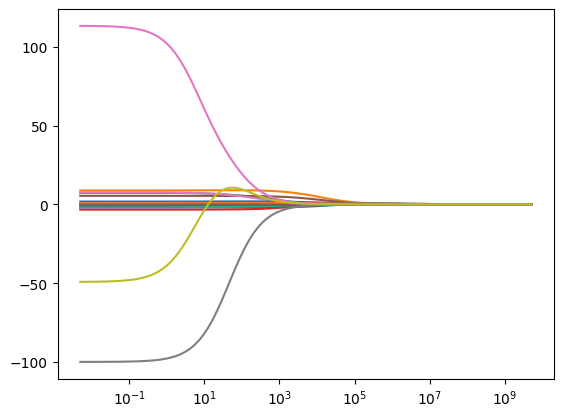

In [64]:
ax = plt.gca()
ax.plot(lambdalar,katsayılar)
ax.set_xscale("log")

# tahmin

In [65]:
ridge_model = Ridge().fit(X_train,y_train)
y_pred = ridge_model.predict(X_train)

In [66]:
y_pred[0:10]

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [67]:
y_train[0:10]

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [68]:
RMSE = np.sqrt(mean_squared_error(y_train,y_pred))

In [69]:
# test hatası
y_pred = ridge_model.predict(X_test)

In [70]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))

# Model Tuning

In [71]:
ridge_model = Ridge(1000).fit(X_train,y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

358.5637914255963

In [72]:
np.random.randint(0,1000,100)

array([569, 873,  50,   0, 225, 569, 169, 239, 102, 874, 981,  99, 687,
       251, 729, 750,  98, 723,  60, 675, 683, 894,  36, 698, 721, 635,
       469, 250, 302, 604, 493,  93, 453, 394, 232, 332, 948, 389,  67,
       152, 202, 579, 887, 620, 703,  73, 101, 278, 224, 597, 316, 473,
       395, 605, 370, 451,  52,  58, 648, 320, 939, 933, 895, 617,  73,
       298, 488, 722, 234,  82,  51, 452,  43, 466,  25,  43, 503, 586,
       261, 910, 951, 209, 934, 158, 164, 197, 927, 254, 863, 604, 925,
       947, 660, 844, 878, 454, 829, 190, 899, 991])

In [73]:
lambdalar1 = np.random.randint(0,1000,100)
lambdalar2 = 10**np.linspace(10,-2,100)*0.5

In [74]:
ridgeCv = RidgeCV(alphas=lambdalar2,scoring="neg_mean_squared_error",cv=10,normalize=True)

In [75]:
ridgeCv.fit(X_train,y_train)

c:\Users\S_05_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
c:\Users\S_05_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preproce

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [76]:
ridgeCv.alpha_

0.7599555414764666

In [77]:
# final modeli
ridge_tuned = Ridge(alpha=ridgeCv.alpha_).fit(X_train,y_train)
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))


356.8583047271522

In [78]:
from sklearn.linear_model import RidgeCV,LassoCV
from sklearn.linear_model import Lasso

In [87]:
df = pd.read_csv("Hitters.csv")

df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [88]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [89]:
df.shape

(263, 20)

In [90]:
lasso_model = Lasso().fit(X_train,y_train)

c:\Users\S_05_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.257e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [91]:
lasso_model.intercept_

-5.587450677336278

In [92]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [93]:
#farklı lamda değerlerine karşılık katsayılar

In [99]:
lasso = Lasso()
coefs = []
alphas = 10**np.linspace(10,-2,100)*0.5

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train,y_train)
    coefs.append(lasso.coef_)


c:\Users\S_05_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.470e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\S_05_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.540e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\S_05_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

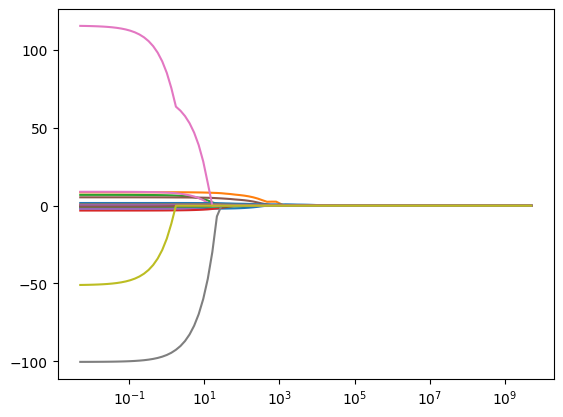

In [100]:
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")

# Tahmin

In [101]:
lasso_model.predict(X_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [104]:
lasso_model.predict(X_test,)[0:5]
y_pred= lasso_model.predict(X_test)

In [105]:
np.sqrt(mean_squared_error(y_test,y_pred))

356.0975884554034

In [106]:
r2_score = r2_score(y_true=y_test,y_pred=y_pred)

# Model Tuning

In [117]:
lasso_cv_model = LassoCV(alphas=lambdalar2,cv=10,max_iter=100000).fit(X_train,y_train)

In [118]:
lasso_cv_model.alpha_

201.85086292982749

In [119]:

lasso_tuned = Lasso().set_params(alpha=lasso_cv_model.alpha_).fit(X_train,y_train)

In [120]:
y_pred = lasso_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

363.6832708037448

In [121]:
pd.Series(lasso_tuned.coef_,index = X_train.columns)

AtBat         -1.052276
Hits           5.342648
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          2.640006
Years          0.000000
CAtBat        -0.174125
CHits          0.249805
CHmRun        -0.000000
CRuns          1.035075
CRBI           0.469281
CWalks        -0.186771
PutOuts        0.272541
Assists        0.170528
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

# elastic net

In [138]:
from sklearn.linear_model import ElasticNet,ElasticNetCV

In [123]:
df = pd.read_csv("Hitters.csv")

df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [124]:
enet_model = ElasticNet().fit(X_train,y_train)

c:\Users\S_05_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.488e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [125]:
enet_model.intercept_

-6.465955602112558

In [126]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [127]:
# tahmin
enet_model.predict(X_train)[0:10]

array([325.74706292, 776.06632333, 522.86508419, 107.64091955,
       449.03139566, 997.76095723,  99.78828622, 311.33763086,
       418.50335021, 879.9502608 ])

In [136]:
enet_model.predict(X_test)[0:10]

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123])

In [135]:
y_pred = enet_model.predict(X_test)

In [134]:
np.sqrt(mean_squared_error(y_test,y_pred))

357.1676548181245

In [137]:
r2_score(y_pred=y_pred,y_test=y_test)

TypeError: 'numpy.float64' object is not callable

# Model Tuning

In [150]:
enet_cv_model = ElasticNetCV(alphas=lambdalar2,cv=10).fit(X_train,y_train)

c:\Users\S_05_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3249.9483099356294, tolerance: 3241.4244490642723
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\S_05_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4337.003156431019, tolerance: 3241.4244490642723
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\S_05_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5751.4247964173555, tolerance: 3241.4244490642723
  model = cd_fast.enet_coordinate_descent_gram(

In [151]:
enet_cv_model.alpha_

5748.784976988678

In [152]:
enet_cv_model.coef_

array([ 0.61111381,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.11212622,  0.        ,
        0.25252702,  0.18656722,  0.00444355,  0.30988823,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ])

In [153]:
enet_cv_model.intercept_

-31.46312122564109

In [154]:
# final modeli

In [155]:
enet_tuned = ElasticNet(alpha=enet_cv_model.alpha_).fit(X_train,y_train)

In [156]:
y_pred = enet_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

393.9753065850553

In [157]:
?ElasticNet

Init signature:
ElasticNet(
    alpha=1.0,
    *,
    l1_ratio=0.5,
    fit_intercept=True,
    normalize='deprecated',
    precompute=False,
    max_iter=1000,
    copy_X=True,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Linear regression with combined L1 and L2 priors as regularizer.

Minimizes the objective function::

        1 / (2 * n_samples) * ||y - Xw||^2_2
        + alpha * l1_ratio * ||w||_1
        + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

If you are interested in controlling the L1 and L2 penalty
separately, keep in mind that this is equivalent to::

        a * ||w||_1 + 0.5 * b * ||w||_2^2

where::

        alpha = a + b and l1_ratio = a / (a + b)

The parameter l1_ratio corresponds to alpha in the glmnet R package while
alpha corresponds to the lambda parameter in glmnet. Specifically, l1_ratio
= 1 is the lasso penalty. Currently, l1_ratio <= 0.01 is not reliable,
unless you supply your own